# Analysis of the AlphaFold predictions of four-domain MetH
## 4. Calculate the average B12 binding site positions and assign an rgb value for each based on its sequence identity to E.coli MetH


In [1]:
import pandas as pd
import pickle
%pylab
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 200

Using matplotlib backend: <object object at 0x7fd0304ce630>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# load the variables
com0_f = open('com0', 'rb')
com0 = pickle.load(com0_f) # serialize the list
com0_f.close()

Bc_f = open('Binding_sites_c', 'rb')
Binding_sites_c = pickle.load(Bc_f) # serialize the list
Bc_f.close()

MetH_4d_info = pd.read_pickle("MetH_4d_info.pkl")
DomainP_clean = MetH_4d_info

In [3]:
# find the average position of the binding sites
Binding_sites_a = []
for i in range(0,len(DomainP_clean)):
    Bs_a_s = []
    for j in range(0,3):
        if not len(Binding_sites_c[i])==3:
            print(i)
        Bs_a_s.append(average(Binding_sites_c[i][j],axis = 0))
    Binding_sites_a.append(Bs_a_s)         

In [4]:
# import the sequence similarity results
al_score = pd.read_csv (r'MetH_SSN_4d_sequence_align.csv')
display(al_score)

,Uniprot_ID,Query Cover,E value,Per_ident,Acc. Len,Accession,Unnamed: 6,Uniprot_ID.1,Unnamed: 8
0,A0A011PTV8,99%,0.000000e+00,61.84,1235,Query_53771,NaN,A0A011PTV8,True
1,A0A011QQ52,99%,0.000000e+00,61.89,1235,Query_53772,NaN,A0A011QQ52,True
2,A0A011UWC2,99%,0.000000e+00,61.12,1269,Query_53773,NaN,A0A011UWC2,True
3,A0A014MEJ6,96%,2.000000e-178,31.15,1167,Query_53774,NaN,A0A014MEJ6,True
4,A0A015LZN5,96%,0.000000e+00,38.62,1145,Query_53775,NaN,A0A015LZN5,True
...,...,...,...,...,...,...,...,...,...
4910,X5PTW8,99%,0.000000e+00,61.38,1262,Query_58681,NaN,X5PTW8,True
4911,X7E2Z4,99%,0.000000e+00,65.61,1244,Query_58682,NaN,X7E2Z4,True
4912,X8CT19,99%,0.000000e+00,62.95,1262,Query_58683,NaN,X8CT19,True
4913,Y0KKR1,99%,0.000000e+00,60.09,1262,Query_58684,NaN,Y0KKR1,True


In [5]:
# fuction to write the positions into a pdb file
def p2p(Matrix_P,name,number):
    Directory_p2p = '.'
    output = open(f"{Directory_p2p}/{name}_position.pdb", "w")
    j = number
    for i in range(0,len(Matrix_P)):
        output.write("%-6s%5d %-4s%s%3s %s%4d%s   %8.3f%8.3f%8.3f%6d%6d%4s%2s\n" % ('HETATM', i, 'O',' ','HOH','A',i,' ',Matrix_P[i][j][0],Matrix_P[i][j][1],Matrix_P[i][j][2],1,0,' ','O'))
    output.close()

In [6]:
# Write the positions for center of mass of each domain into pdb files
p2p(com0,'Hcy_com',0)
p2p(com0,'MTHF_com',1)
p2p(com0,'cap_com',2)
p2p(com0,'B12_com',3)
p2p(com0,'AdoMet_com',4)

In [7]:
# Write the positions for the average binding sites into pdb files
p2p(Binding_sites_a,'Zinc_binding',0)
p2p(Binding_sites_a,'B12_binding',1)
p2p(Binding_sites_a,'SAM_binding',2)

In [8]:
# Define the function of generating spectrum and plot the color key

def colorFader(c1,c2,c3,c4,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    c3=np.array(mpl.colors.to_rgb(c3))
    c4=np.array(mpl.colors.to_rgb(c4))
    #print(c4)
    if mix<1/3:
        return mpl.colors.to_hex((1-mix*3)*c1 + mix*3*c2)
    if mix>=1/3 and mix<2/3:
        return mpl.colors.to_hex((1-(mix-1/3)*3)*c2 + (mix-1/3)*3*c3)
    if mix>=2/3:
        return mpl.colors.to_hex((1-(mix-2/3)*3)*c3 + (mix-2/3)*3*c4)

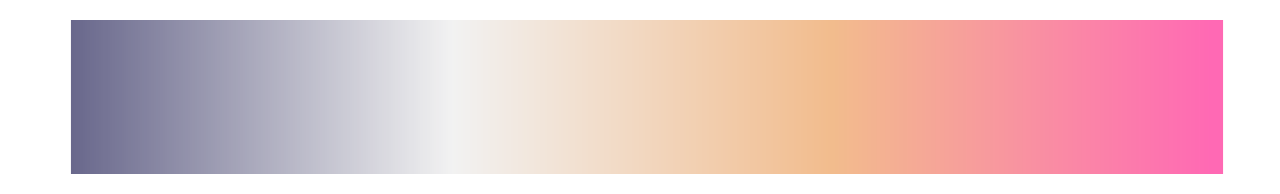

In [9]:
# Plot the color key

c1='#69688C' #purple
c2='#F2F2F2' #white
c3='#F2BC8D' #orange
c4='#FF69B4' #hot pink

n=500

fig, ax = plt.subplots(figsize=(8, 1))
for x in range(n+1):
    ax.axvline(x, color=colorFader(c1,c2,c3,c4,x/n), linewidth=4) 
    ax.axis('off')
plt.show()

In [10]:
# Generate color spectrum and save it to txt
rgb_sp2 = []
for i in range(0,len(com0)):
    if al_score.Per_ident[i] <70:
        mix = (al_score.Per_ident[i]-min(al_score.Per_ident))/(70-min(al_score.Per_ident))
    if al_score.Per_ident[i] >=70:
        mix = 1
    colorhex = colorFader(c1,c2,c3,c4,mix)
    rgb_s = np.array(mpl.colors.to_rgb(colorhex))
    rgb_sp2.append(rgb_s.tolist())
Directory_color = '.'
output_color = open(f"{Directory_color}/rgb_value.txt", "w")
output_color.write(str(rgb_sp2))
output_color.close()